# Kaggle Titanic Dataset Challenge – EDA

_created by Austin Poor_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from pathlib import Path
DATA_DIR = Path("../data")
list(DATA_DIR.glob("*"))

[PosixPath('../data/test.csv'),
 PosixPath('../data/train.csv'),
 PosixPath('../data/.ipynb_checkpoints'),
 PosixPath('../data/gender_submission.csv'),
 PosixPath('../data/.gitinclude')]

In [3]:
df_train = pd.read_csv(DATA_DIR / "train.csv")
df_train = pd.get_dummies(
    df_train,
    columns=["Sex","Embarked"],
    drop_first=True
)
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [5]:
# Compare columns by the absolute value of their 
# correlation with the target (Survived)

df_train.corr()["Survived"]\
    .apply(lambda c: (abs(c), c))\
    .sort_values(ascending=False)\
    .apply(lambda c: c[1])

Survived       1.000000
Sex_male      -0.543351
Pclass        -0.338481
Fare           0.257307
Embarked_S    -0.155660
Parch          0.081629
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Embarked_Q     0.003650
Name: Survived, dtype: float64

In [6]:
plot_cols = np.array([
    "Survived",
    "Sex_male",
    "Pclass",
    "Fare",
    "Embarked_S",
    "Parch",
    "Age",
    "SibSp",
    "Embarked_Q"
]).reshape((3,3))

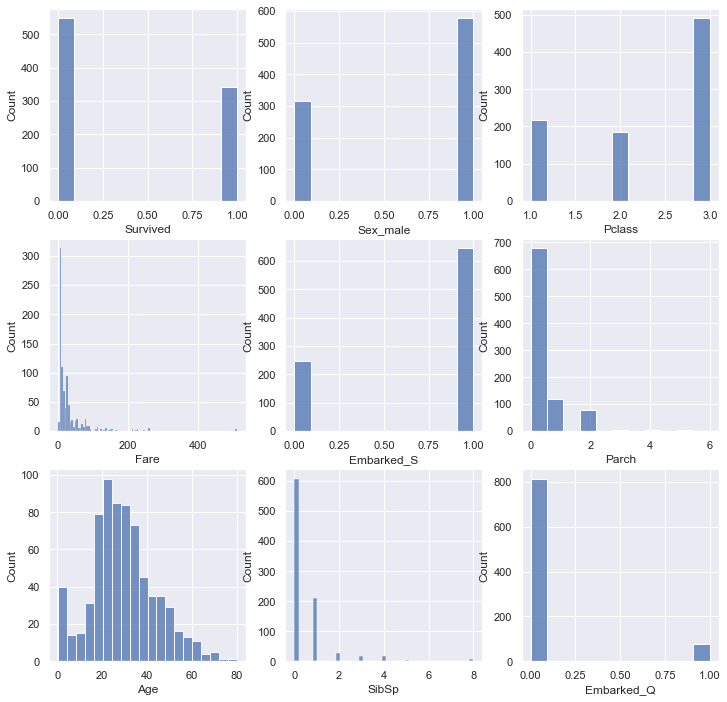

In [7]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
for i, r in enumerate(plot_cols):
    for j, c in enumerate(r):
        sns.histplot(df_train[c],ax=ax[i,j])

In [8]:
df_train.Survived.mean()

0.3838383838383838

In [9]:
# What proportions of rows have at least
# one NA value?
df_train.isna().any(0).mean()

0.15384615384615385

In [10]:
# What columns have the most NA values?
df_train.isna().mean(0)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Sex_male       0.000000
Embarked_Q     0.000000
Embarked_S     0.000000
dtype: float64

In [11]:
pd.DataFrame({
    "Survived": df_train.Survived,
    "IsCabinNA": df_train.Cabin.isna(),
    "IsAgeNA": df_train.Age.isna()
}).corr()["Survived"]

Survived     1.000000
IsCabinNA   -0.316912
IsAgeNA     -0.092197
Name: Survived, dtype: float64

It looks like `df.Cabin.isna()` has a strong correlation with survival so let's try to keep that information.

`df.Age.isna()`'s correlation seems to be even stronger than `df.Age`'s correlation so let's keep that information too.

In [12]:
df_train.isna().sum(0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [13]:
df_train.median(0)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Sex_male         1.0000
Embarked_Q       0.0000
Embarked_S       1.0000
dtype: float64

Understanding the `Ticket` column

In [14]:
df_train.Ticket.str.replace("[^a-z]","",case=False,regex=True).value_counts()

             661
PC            60
CA            41
A             28
STONO         18
SOTONOQ       15
WC            10
SCPARIS        7
SOC            6
FCC            5
C              5
SCParis        4
LINE           4
SOPP           3
WEP            3
PP             3
SWPP           2
SOTONO         2
PPP            2
SCAH           2
SCA            1
SCAHBasle      1
Fa             1
FC             1
CASOTON        1
SOP            1
SCOW           1
AS             1
SP             1
SC             1
Name: Ticket, dtype: int64

In [15]:
ticket_bases = {t: i for i, t in enumerate(
    df_train.Ticket.str.replace("[^a-z]","",
        case=False,regex=True).value_counts().index)}
ticket_bases

{'': 0,
 'PC': 1,
 'CA': 2,
 'A': 3,
 'STONO': 4,
 'SOTONOQ': 5,
 'WC': 6,
 'SCPARIS': 7,
 'SOC': 8,
 'FCC': 9,
 'C': 10,
 'SCParis': 11,
 'LINE': 12,
 'SOPP': 13,
 'WEP': 14,
 'PP': 15,
 'SWPP': 16,
 'SOTONO': 17,
 'PPP': 18,
 'SCAH': 19,
 'SCA': 20,
 'SCAHBasle': 21,
 'Fa': 22,
 'FC': 23,
 'CASOTON': 24,
 'SOP': 25,
 'SCOW': 26,
 'AS': 27,
 'SP': 28,
 'SC': 29}

In [16]:
pd.get_dummies(pd.DataFrame({
        "Survived": df_train.Survived,
        "TicketBase": df_train.Ticket.str.replace("[^a-z]","",
            case=False,regex=True)
    }),
        columns=["TicketBase"],
        drop_first=True
    ).corr()["Survived"]\
    .apply(lambda c: (abs(c), c))\
    .sort_values(ascending=False)\
    .apply(lambda c: c[1])

Survived                1.000000
TicketBase_PC           0.147062
TicketBase_A           -0.115712
TicketBase_SOTONOQ     -0.067404
TicketBase_FCC          0.064285
TicketBase_WC          -0.062182
TicketBase_SWPP         0.060095
TicketBase_SOPP        -0.045876
TicketBase_SCAHBasle    0.042470
TicketBase_SC           0.042470
TicketBase_SOTONO      -0.037436
TicketBase_SOC         -0.036769
TicketBase_PP           0.033803
TicketBase_Fa          -0.026456
TicketBase_CASOTON     -0.026456
TicketBase_FC          -0.026456
TicketBase_AS          -0.026456
TicketBase_SCOW        -0.026456
TicketBase_SOP         -0.026456
TicketBase_SP          -0.026456
TicketBase_SCA         -0.026456
TicketBase_CA          -0.019137
TicketBase_LINE        -0.018481
TicketBase_STONO        0.017895
TicketBase_SCParis      0.016040
TicketBase_PPP          0.011329
TicketBase_SCAH         0.011329
TicketBase_SCPARIS      0.008185
TicketBase_WEP         -0.006036
TicketBase_C            0.002496
Name: Surv

## Preprocessing Data with `scripts/preprocess.py`

In [17]:
import sys
sys.path.append(str(Path("../scripts").resolve()))

In [18]:
import preprocess

In [19]:
preprocess.load_df(DATA_DIR / "train.csv")

,Survived,Pclass,Age,SibSp,Parch,Fare,IsCabinNA,IsAgeNA,Sex_male,Embarked_Q,...,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,TicketBase_0,TicketBase_1,TicketBase_2,TicketBase_3,TicketBase_4
0,0,3,22.0,1,0,7.2500,True,False,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,False,False,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,True,False,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,False,False,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,True,False,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,1,0,...,0,0,0,0,0,1,0,0,0,0
887,1,1,19.0,0,0,30.0000,False,False,0,0,...,0,0,0,0,0,1,0,0,0,0
888,0,3,28.0,1,2,23.4500,True,True,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,False,False,1,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
preprocess.load_df(DATA_DIR / "train.csv")\
    .corr()["Survived"]\
    .apply(lambda c: (abs(c), c))\
    .sort_values(ascending=False)\
    .apply(lambda c: c[1])

Survived        1.000000
Sex_male       -0.543351
Pclass         -0.338481
IsCabinNA      -0.316912
Fare            0.257307
CabinGroup_B    0.175095
Embarked_S     -0.155660
CabinGroup_D    0.150716
TicketBase_1    0.147062
CabinGroup_E    0.145321
TicketBase_3   -0.115712
CabinGroup_C    0.114652
IsAgeNA        -0.092197
Parch           0.081629
Age            -0.064910
CabinGroup_F    0.057935
SibSp          -0.035322
CabinGroup_T   -0.026456
TicketBase_2   -0.019137
TicketBase_4    0.017895
CabinGroup_G    0.016040
Embarked_Q      0.003650
TicketBase_0    0.001492
Name: Survived, dtype: float64

In [21]:
preprocess.load_df(DATA_DIR / "train.csv").isna().mean(0)

Survived        0.0
Pclass          0.0
Age             0.0
SibSp           0.0
Parch           0.0
Fare            0.0
IsCabinNA       0.0
IsAgeNA         0.0
Sex_male        0.0
Embarked_Q      0.0
Embarked_S      0.0
CabinGroup_B    0.0
CabinGroup_C    0.0
CabinGroup_D    0.0
CabinGroup_E    0.0
CabinGroup_F    0.0
CabinGroup_G    0.0
CabinGroup_T    0.0
TicketBase_0    0.0
TicketBase_1    0.0
TicketBase_2    0.0
TicketBase_3    0.0
TicketBase_4    0.0
dtype: float64